# Q2
Here we use 4th order Runge-Kutta to numerical solve the radial solution to the TISE for the electron in a Hydrogen atom.
The ODE we need to solve then is as follows:
$$\frac { \mathrm { d } } { \mathrm { d } r } \left( r ^ { 2 } \frac { \mathrm { d } R } { \mathrm { d } r } \right) - \frac { 2 m r ^ { 2 } } { \hbar ^ { 2 } } [ V ( r ) - E ] R = \ell ( \ell + 1 ) R$$
Making use of the following expression for potential:

$$V ( r ) = - e ^ { 2 } / \left( 4 \pi \epsilon _ { 0 } r \right)$$

## Part a
Here we make use of a simple change of variables to write this second order ODE as two coupled first order ODEs in the code so we can apply RK4. We also impose boundary conditions of $R(h) = 0, \ S(h) = 1$ where $S$ is our intermediate function to decouple the system and $h$ is our time step.

In [65]:
import numpy as np
import scipy.constants as pc
import scipy.integrate as scigrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [92]:
# Constants
a = pc.physical_constants['Bohr radius'][0] # Bohr radius 
E0 = pc.physical_constants['Rydberg constant times hc in eV'][0] #rydberg 
m = pc.m_e # electron mass
hbar = pc.hbar # Planck's constant over 2*pi
e = pc.e # elementary charge
epsilon = pc.epsilon_0 #permittivity of space
h = 0.0005*a#steps 
L = 25*a #r infinity

In [93]:
# Potential function
def V(x):                            
    return -e**2/(4*np.pi*epsilon*x)
def f(r,x,E, l):
    R = r[0] 
    S = r[1] 
    fR = S
    fS = (l*(l+1)/x**2 + (2*m/hbar**2)*(V(x) - E))*R #COV R --> rR
    return np.array([fR,fS],float)
    # Calculate the wavefunction for a particular energy 
def solve(E,l): 
    R = 0.0 #R(h) = 0 
    S = 1.0 #S(h) = 1 left boundary conditions 
    r = np.array([R,S],float)
    Rpoints = np.arange((L-h)/h)
    xpoints = np.arange(h,L,h)
    i = 0 #set index seed
    for x in xpoints:#start integration starting at x=h 
        Rpoints[i] = r[0]/x #divide by position to accomodate for COV
        i = i+1 #increment index
        k1 = h*f(r,x,E,l) 
        k2 = h*f(r+0.5*k1,x+0.5*h,E,l)
        k3 = h*f(r+0.5*k2,x+0.5*h,E,l)
        k4 = h*f(r+k3,x+h,E,l) 
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]/L, Rpoints, xpoints #division to accomodate for COV

# Part b
Here we numerically approximate the radial part of the Hydrogen wave function for ground state with spherical harmonic of order $l=1$  and first excited state with spherical harmonic of order $l=0$ and with order $l=1$. 

In [94]:
## Part B 
# Main program to find the energy using the secant method 
n = 1.0 
l = 0.0
E1 = -15*e/n**2 #bracket energies 
E2 = -13*e/n**2
R2, Rpoints_1, xpoints_1 = solve(E1,l)
target = e/1000
while abs(E1-E2)>target: 
    R1 = R2
    R2,Rpoints_1,xpoints_1 = solve(E2,l) 
    E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1) 
print("E =",E2/e,"eV")

E = -13.578719984230597 eV


In [95]:
n = 2.0 
l = 0.0
E1 = -15*e/n**2 #bracket energies 
E2 = -13*e/n**2
R2, Rpoints_2, xpoints_2 = solve(E1,l)
while abs(E1-E2)>target: 
    R1 = R2
    R2, Rpoints_2, xpoints_2 = solve(E2,l) 
    E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1) 
E_2_0 = E2
print("E =",E2/e,"eV")

E = -3.398044063863489 eV


In [96]:
# Part B Part 2
n = 2.0 
l = 1.0
E1 = -15*e/n**2 #bracket energies 
E2 = -13*e/n**2
R2, Rpoints_3, xpoints_3 = solve(E1,l)
while abs(E1-E2)>target: 
    R1 = R2
    R2, Rpoints_3, xpoints_3 = solve(E2,l) 
    E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1) 
E_2_1 = E2
print("E =",E2/e,"eV")

E = -3.401426058123551 eV


In [97]:
diff = abs(E_2_0-E_2_1)
print('Difference is ', diff, ' J')

Difference is  5.418552135151632e-22  J


We know that the energy for $n=2$ with $l=0$ and $l=1$ should be equal. Here, we see a difference of $\sim 5.4\mathrm{e}-22 \ \mathrm{J}$ for a target energy convergence of $e/1000$. For a smaller target convergence of $e/100$ we get a difference of $\sim 5.07\mathrm{e}-22 \ \mathrm{J}$. Increasing target convergence by yet another factor of 10 we see difference of $\sim 4.89\mathrm{e}-22 \ \mathrm{J}$. With target convergence of $e/100000$ we have difference of $\sim 5.412\mathrm{e}-22 \ \mathrm{J}$. So it appears at the value of target increases, so does the difference between the energy estimation for the first excited state with $l=0$ and with $l=1$.
Increasing $r_{\infty}$ by a factor of 2, with target of e/1000 didn't much affect the difference between the two energies that should be equal but it did change E_2_0 by nearly a factor of 2. Increasing this value further makes the computation time immensly slow. 
Changing step size $h$ to be smaller by a factor of 2 doesn't greatly affect the energy estimations.

# Part c
Here we plot the wavefuctions for the 3 different states we numerically approximated above. Note: the target was e/1000 and $r_{\infty} = 25a$, $h = 0.0005a$

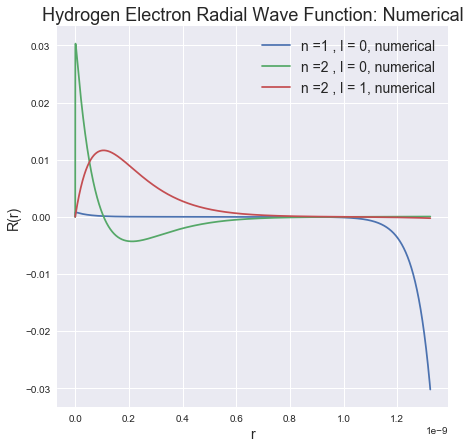

In [98]:
# Part C 
# Integration 
# you can use scigrate.simps, I asked the TA
from scipy.integrate import simps
from numpy import sqrt
norm_1 = simps(abs(Rpoints_1)**2)
norm_2 = simps(abs(Rpoints_2)**2)
norm_3 = simps(abs(Rpoints_3)**2)

#normalize
Rpoints_1 = Rpoints_1/np.sqrt(norm_1)
Rpoints_2 = Rpoints_2/np.sqrt(norm_2)
Rpoints_3 = Rpoints_3/np.sqrt(norm_3)

r = xpoints_1
#plots
plt.figure(figsize =(7,7))
plt.plot(r,Rpoints_1, label = 'n =1 , l = 0, numerical')
plt.plot(r, Rpoints_2,  label = 'n =2 , l = 0, numerical' )
plt.plot(r, Rpoints_3,  label = 'n =2 , l = 1, numerical')
plt.title( 'Hydrogen Electron Radial Wave Function: Numerical', fontsize = '18')
plt.xlabel('r', fontsize = 14)
plt.ylabel('R(r)', fontsize = 14)
plt.legend(fontsize = 14)

# Part d
Below is a plot containing the analytical solutions for the radial wavefunction of these states as sourced from here http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hydwf.html to faciliate comparison with the plot of the numerical solutions above.
Additionally, we have put all 6 graphs on a plot as well for comparison

In [100]:
# Part D
# Analytic Solution for n = 1 , l = 0 
pos_1_0 = 2/a **(3/2) * np.exp(-r/a)
#Analytic Solution for n = 2, l = 0
pos_2_0 = 1/(2*np.sqrt(2)* a ** (3/2))*(2-r/a)* np.exp(-r/a)
#Analytic Solution for n = 2, l = 1
pos_2_1 = 1/(2*np.sqrt(6)* a ** (3/2))*(r/a)* np.exp(-r/a)

norm_1_0 = simps(abs(pos_1_0)**2)
norm_2_0 = simps(abs(pos_2_0)**2)
norm_2_1 = simps(abs(pos_2_1)**2)

pos_1_0 = pos_1_0/np.sqrt(norm_1_0)
pos_2_0 = pos_2_0/np.sqrt(norm_2_0)
pos_2_1 = pos_2_1/np.sqrt(norm_2_1)

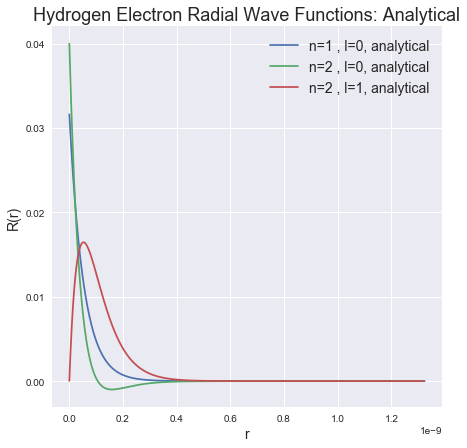

In [101]:
plt.figure(figsize =(7,7))
plt.plot(r,pos_1_0 , label = 'n=1 , l=0, analytical')
plt.plot(r, pos_2_0 ,  label = 'n=2 , l=0, analytical' )
plt.plot(r, pos_2_1 ,  label = 'n=2 , l=1, analytical')
plt.title( 'Hydrogen Electron Radial Wave Functions: Analytical', fontsize = '18')
plt.xlabel('r', fontsize = '14')
plt.ylabel('R(r)', fontsize = '14')
plt.legend(fontsize = '14')

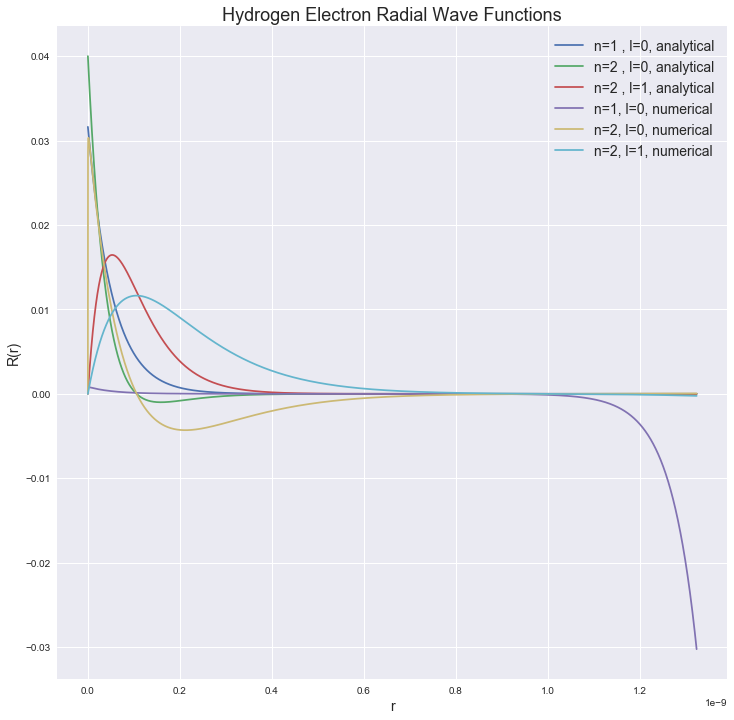

In [102]:
plt.figure(figsize =(12,12))
plt.plot(r,pos_1_0 , label = 'n=1 , l=0, analytical')
plt.plot(r, pos_2_0 ,  label = 'n=2 , l=0, analytical' )
plt.plot(r, pos_2_1 ,  label = 'n=2 , l=1, analytical')
plt.plot(r, Rpoints_1, label = 'n=1, l=0, numerical')
plt.plot(r, Rpoints_2, label = 'n=2, l=0, numerical')
plt.plot(r, Rpoints_3, label = 'n=2, l=1, numerical')
plt.title('Hydrogen Electron Radial Wave Functions', fontsize = '18')
plt.xlabel('r', fontsize = '14')
plt.ylabel('R(r)', fontsize = '14')
plt.legend(fontsize = '14')

We observe that there are some qualitative similarities between the numerical and analytical solutions. $n=2$, $l=0$ dips below the x axis at a similar time and has similiar concavity but on different intervals. $n=1, \ l=0$ are both close to the x axis after some value but the numerical solution lacks the large values for small $r$ and instead has very negative values for large $r$. For $n=2, l=1$ we see a bump above the x axis before assymptotically approaching zero, the bumps do not overlap well.
However, largely the numerical solutions are not very accurate here. 